In [1]:
import pandas as pd
import pathlib
import json
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from pathlib import Path
import json
from tqdm import tqdm

In [2]:
path_meta_in = "/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/red_data_insiders_2024_MetadatosEnero2026"

path_embeddings_in0 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_00/embeddings.parquet"
path_embeddings_in1 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_01/embeddings.parquet"
path_embeddings_in2 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_02/embeddings.parquet"

path_lemmas_in0 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_00/final"
path_lemmas_in1 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_01/final"
path_lemmas_in2 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_insiders_2024/part_02/final"


path_meta_out = "/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/red_data_outsiders_2024_MetadatosEnero2026/"
path_embeddings_out = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_outsiders_2024/embeddings.parquet"
path_lemmas_out = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_all_outsiders_2024/final/"



#read. all. insiders
df_meta_in = pd.read_parquet(path_meta_in)
df_emb_in0 = pd.read_parquet(path_embeddings_in0)
df_emb_in1 = pd.read_parquet(path_embeddings_in1)
df_emb_in2 = pd.read_parquet(path_embeddings_in2)

df_lem_in0 = pd.read_parquet(path_lemmas_in0)
df_lem_in1 = pd.read_parquet(path_lemmas_in1)
df_lem_in2 = pd.read_parquet(path_lemmas_in2)

df_embeddings_in = pd.concat([df_emb_in0, df_emb_in1, df_emb_in2], ignore_index=True)

df_lemmas_in = pd.concat([df_lem_in0, df_lem_in1, df_lem_in2], ignore_index=True)

#readall. outsiders
df_meta_out = pd.read_parquet(path_meta_out)
df_embeddings_out = pd.read_parquet(path_embeddings_out)
df_lemmas_out = pd.read_parquet(path_lemmas_out)

In [3]:
df_all = pd.merge(df_meta_in, df_embeddings_in, left_on="place_id", right_on="doc_id", how="inner")

#df_all = pd.merge(df_all, df_lemmas_in[["place_id", "generative_objective"]], on="place_id", how="inner")

print(len(df_all))
print(len(df_meta_in))
print(len(df_embeddings_in))
#print(len(df_lemmas_in))


# samefor outsider
df_all_out = pd.merge(df_meta_out, df_embeddings_out, left_on="place_id", right_on="doc_id", how="inner")

print(len(df_all_out))

#df_all_out = pd.merge(df_all_out, df_lemmas_out[["place_id", "generative_objective"]], on="place_id", how="inner")

#merge all together.withacolumn to identify insider/outsider
df_all["origin"] = "insider"
df_all_out["origin"] = "outsider"

df_final = pd.concat([df_all, df_all_out], ignore_index=True)

print(len(df_final))

114500
114600
114500
35340
149840


/tmp/ipykernel_881851/2332623186.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_all, df_all_out], ignore_index=True)
/tmp/ipykernel_881851/2332623186.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_all, df_all_out], ignore_index=True)


In [17]:
list(df_final["lotes"].values)

['{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassificationCode": "", "TaxExclusiveAmount": "", "numLotes": "", "name": ""}',
 '{"ItemClassi

In [18]:
#df_lemmas_all = df_final[["place_id", "generative_objective"]]

#df_lemmas_all.to_parquet("/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/in_out_to_preproc.parquet", index=False)

# read preproc, merge with df_final to get the lemmas
df_preproc = pd.read_parquet("/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/in_out_to_preproc_preproc_embeddings.parquet")

df_final_preproc = pd.merge(df_final, df_preproc[["place_id", "lemmas"]], on="place_id", how="inner")

print(len(df_final))
print(len(df_final_preproc))

149840
144477


## Dataset CPV5 level

In [19]:
path_cpv5 = "/export/data_ml4ds/NextProcurement/pruebas_oct_2025/objective_extractor/results_cpv5/final"
df_cpv5 = pd.read_parquet(path_cpv5)
df_cpv5

,place_id,link,cpv,title,url,id,resultado_tecnico,path_tecnico,resultado_administrativo,path_administrativo,...,generative_token_recall,generative_token_f1,generative_time_seconds,bm25_used,bm25_reasons,total_nodes,regex_anchor_found,regex_anchor_position,retriever_anchor_found,retriever_anchor_position
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
0,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,['66511000.0'],Seguro de vida colectivo trabajadores IMAE,{'administrativo': 'https://contrataciondelest...,I0,Error HTTP: 500,,Error HTTP: 500,,...,0.166667,0.068966,36.668550,False,[disabled_in_config],1,False,NaN,False,NaN
1,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,['48821000.0'],Suministro de dos servidores virtualizados par...,{'administrativo': 'https://contrataciondelest...,I1,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,0.714286,0.111111,28.309683,False,[disabled_in_config],6,False,NaN,False,NaN
2,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,['79995000.0'],Servicio técnico de apoyo a la migración del c...,{'administrativo': 'https://contrataciondelest...,I2,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,1.000000,0.279570,20.689976,False,[disabled_in_config],20,True,0.0,True,1.0
10,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,"['[90911200, 90921000, 90923000, 98311000, 909...",Servicio de limpieza integral de la sede de la...,{'administrativo': 'https://contrataciondelest...,I10,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,0.500000,0.094340,26.124785,False,[disabled_in_config],63,True,0.0,True,50.0
11,https://contrataciondelestado.es/sindicacion/l...,https://contrataciondelestado.es/wps/poc?uri=d...,['39141000.0'],(02J) TA PAAS Adquisición con instalación de e...,{'administrativo': 'https://contrataciondelest...,I11,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,0.500000,0.200000,15.876936,False,[disabled_in_config],6,True,0.0,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132446,https://contrataciondelestado.es/sindicacion/P...,https://contractaciopublica.cat/ca/detall-publ...,"['[30197643, 30197000, 22993300]']",És objecte del present contracte el subministr...,{'administrativo': 'https://contractaciopublic...,O17846,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,0.130435,0.090909,23.840058,False,[disabled_in_config],20,False,NaN,True,1.0
132447,https://contrataciondelestado.es/sindicacion/P...,https://contractaciopublica.cat/ca/detall-publ...,"['[64221000, 64212000, 64200000, 32552100, 322...",Servei de telecomunicacions i tecnologies de l...,{'administrativo': 'https://contractaciopublic...,O17847,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,0.176471,0.047619,37.925678,False,[disabled_in_config],32,True,0.0,True,12.0
132449,https://contrataciondelestado.es/sindicacion/P...,https://contractaciopublica.cat/ca/detall-publ...,['48325000.0'],Contracte administratiu per la renovació d’una...,{'administrativo': 'https://contractaciopublic...,O17849,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,Descargado correctamente,//export/data_ml4ds/NextProcurement/Junio_2025...,...,0.300000,0.117647,28.206214,False,

In [20]:
import langdetect

def detect_language(text):
    if not isinstance(text, str) or not text.strip():
        return "unknown"
    try:
        return langdetect.detect(text)
    except langdetect.LangDetectException:
        return "unknown"

from tqdm import tqdm
tqdm.pandas()
df_cpv5["language"] = df_cpv5["generative_objective"].progress_apply(detect_language)

100%|██████████| 45084/45084 [02:02<00:00, 369.04it/s]


In [8]:
df_cpv5["language"].unique()

array(['es', 'unknown', 'ca', 'en'], dtype=object)

In [21]:
from typing import Optional, Dict
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
import torch


class MultiToSpanishTranslator:
    """
    OPUS Marian (Helsinki-NLP) translator: ca/gl/eu -> es using Hugging Face pipelines.
    Load once; route by detected source language.
    """

    def __init__(
        self,
        ca_repo: str = "Helsinki-NLP/opus-mt-ca-es",
        gl_repo: str = "Helsinki-NLP/opus-mt-gl-es",
        eu_repo: str = "Helsinki-NLP/opus-mt-eu-es",
        max_length: int = 512,
        use_cpu: bool = True,  # Nuevo parámetro para forzar CPU
    ):
        self._pipes: Dict[str, any] = {}
        self._enc_max_len = max_length
        self._gen_max_len = max_length
        self.use_cpu = use_cpu

        print("Inicializando MultiToSpanishTranslator...")

        def _load(lang: str, repo: Optional[str]):
            if not repo:
                print(f"  ⚠️  No se proporcionó repo para {lang}")
                return
            
            print(f"\n  Cargando {lang} desde {repo}...")
            
            try:
                print(f"    - Descargando tokenizer...")
                tok = AutoTokenizer.from_pretrained(repo)
                
                print(f"    - Descargando modelo...")
                mdl = AutoModelForSeq2SeqLM.from_pretrained(repo)

                tok.model_max_length = self._enc_max_len
                tok.truncation_side = "right"
                tok.padding_side = "right"

                # Usar CPU directamente
                device = -1  # -1 significa CPU en transformers
                print(f"    - Usando CPU")
                
                print(f"    - Creando pipeline...")
                self._pipes[lang] = pipeline(
                    task="translation",
                    model=mdl,
                    tokenizer=tok,
                    device=device,  # -1 para CPU
                    max_length=self._gen_max_len,
                    truncation=True,
                )
                
                print(f"    ✓ Modelo {lang} cargado en CPU")
                
            except Exception as e:
                print(f"    ✗ Error cargando modelo {lang}: {e}")
                import traceback
                traceback.print_exc()

        _load("ca", ca_repo)
        _load("gl", gl_repo)
        _load("eu", eu_repo)
        
        print(f"\n✓ Inicialización completa. Modelos cargados: {list(self._pipes.keys())}")

    def available(self, lang: str) -> bool:
        return lang in self._pipes

    def translate(self, text: str, lang: str) -> str:
        """
        Translate from 'ca' | 'gl' | 'eu' -> 'es'.
        """
        pipe = self._pipes.get(lang)
        if not pipe or not text:
            return text
        
        try:
            result = pipe(
                text,
                max_length=self._gen_max_len,
                truncation=True,
                # QUITAR padding=True - no es válido para pipelines de traducción
            )
            
            if isinstance(result, list) and len(result) > 0:
                return result[0]["translation_text"]
            else:
                print(f"⚠️  Resultado inesperado: {result}")
                return text
                
        except Exception as e:
            print(f"❌ Error en translate: {e}")
            import traceback
            traceback.print_exc()
            return text

    def translate_all(self, text: str, lang: str, chunk_chars: int = 1200) -> str:
        """
        Splits long text into chunks, translates each, joins.
        """
        if not text:
            return text
        
        safe_chunk_size = (self._enc_max_len * 3)  # ~1536 chars para 512 tokens
        
        if len(text) <= safe_chunk_size:
            return self.translate(text, lang)
        
        # Dividir por oraciones para mantener coherencia
        sentences = text.split('. ')
        chunks = []
        current_chunk = ""
        
        for sentence in sentences:
            if len(current_chunk) + len(sentence) + 2 < safe_chunk_size:
                current_chunk += sentence + ". "
            else:
                if current_chunk:
                    chunks.append(current_chunk.strip())
                current_chunk = sentence + ". "
        
        if current_chunk:
            chunks.append(current_chunk.strip())
        
        # Traducir cada chunk
        translated = []
        for i, chunk in enumerate(chunks):
            try:
                result = self.translate(chunk, lang)
                translated.append(result)
            except Exception as e:
                print(f"Error en chunk {i}: {e}")
                translated.append(chunk)
        
        return " ".join(s.strip() for s in translated)


# Inicializar usando CPU
translation_model_ca_es = "Helsinki-NLP/opus-mt-ca-es"
translation_model_gl_es = "Helsinki-NLP/opus-mt-gl-es"
translation_model_eu_es = "Helsinki-NLP/opus-mt-eu-es"

multi_translator = MultiToSpanishTranslator(
    ca_repo=translation_model_ca_es,
    gl_repo=translation_model_gl_es,
    eu_repo=translation_model_eu_es,
    max_length=512,
    use_cpu=True  # Forzar uso de CPU
)

Inicializando MultiToSpanishTranslator...

  Cargando ca desde Helsinki-NLP/opus-mt-ca-es...
    - Descargando tokenizer...
    - Descargando modelo...


Device set to use cpu


    - Usando CPU
    - Creando pipeline...
    ✓ Modelo ca cargado en CPU

  Cargando gl desde Helsinki-NLP/opus-mt-gl-es...
    - Descargando tokenizer...
    - Descargando modelo...


Device set to use cpu


    - Usando CPU
    - Creando pipeline...
    ✓ Modelo gl cargado en CPU

  Cargando eu desde Helsinki-NLP/opus-mt-eu-es...
    - Descargando tokenizer...
    - Descargando modelo...


Device set to use cpu


    - Usando CPU
    - Creando pipeline...
    ✓ Modelo eu cargado en CPU

✓ Inicialización completa. Modelos cargados: ['ca', 'gl', 'eu']


In [22]:
df_cpv5[df_cpv5.language != "es"][["place_id", "texto_tecnico","generative_objective"]]

# conservar los que no son "/" y los que tengan "el objeto es" (en otro idioma) traducirlos al español

df_cpv5_no_prob = df_cpv5[df_cpv5.language == "es"]
df_cpv5_prob = df_cpv5[~df_cpv5.language.isin(["es", "en"])].copy()

df_cpv5_prob = df_cpv5_prob[df_cpv5_prob.generative_objective.str.contains("/") == False]

# traducir los que tengan de df_cpv5_prob
def translate_row(row):
    lang = row["language"]
    text = row["generative_objective"]
    return multi_translator.translate_all(text, lang)   

tqdm.pandas()
df_cpv5_prob["generative_objective_translated"] = df_cpv5_prob.progress_apply(translate_row, axis=1)

100%|██████████| 15/15 [00:42<00:00,  2.85s/it]


In [23]:
df_cpv5_prob["generative_objective_translated"]

__null_dask_index__
133079    El objetivo es la contratación del servicio de...
134157    El objetivo es la contratación del servicio de...
135595    El objetivo es el suministro de 95 sillas dest...
137777    El objetivo es la contratación del suministro ...
142905    El objetivo es la redacción del proyecto ejecu...
148427    El objetivo es la dinamización y apoyo a los n...
9420      El objetivo es el alquiler, transporte y gesti...
114818    El objetivo es la ejecución de actuaciones de ...
116358    El objetivo es la suministración e instalación...
120726    El objetivo es la contratación de un servicio ...
127557    El objetivo es el contrato mixto de suministro...
128074    El objetivo es el suministro de complementos d...
129799    El objetivo es la contratación del servicio de...
131899    El objetivo es desarrollar una estrategia de p...
132147    El objetivo es la prestación de servicios de c...
Name: generative_objective_translated, dtype: object

In [24]:
len(df_cpv5_prob)

15

In [12]:
# concat back to get the final df_cpv5
df_cpv5_prob["generative_objective"] = df_cpv5_prob["generative_objective_translated"]
df_cpv5_final = pd.concat([df_cpv5_no_prob, df_cpv5_prob], ignore_index=True)
print(len(df_cpv5_final))

43315


In [26]:
# rows of df_cpv5 where place_id is in not in df_all
df_cpv5_not_in_all = df_cpv5_final[~df_cpv5_final['place_id'].isin(df_all['place_id'])]
print(len(df_cpv5_not_in_all))
#df_cpv5_not_in_all.to_parquet("data/df_cpv5_not_in_all.parquet")

9923


In [27]:
df_cpv5_not_in_all.generative_objective

1167     El objetivo es el acompañamiento al Instituto ...
1168     El objetivo es prestar un servicio integral de...
1169     El objetivo es la contratación de servicios de...
1170     El objetivo es la reforma y adecuación de un g...
1171     El objetivo es el suministro de complementos d...
                               ...                        
43310    El objetivo es el contrato mixto de suministro...
43311    El objetivo es el suministro de complementos d...
43312    El objetivo es la contratación del servicio de...
43313    El objetivo es desarrollar una estrategia de p...
43314    El objetivo es la prestación de servicios de c...
Name: generative_objective, Length: 9923, dtype: object

In [28]:
# drop translated column to save space
df_cpv5_final.drop(columns=["generative_objective_translated"], inplace=True)

In [29]:
# save df to lematize 
#df_cpv5_final[["place_id", "generative_objective"]].to_parquet("/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/df_cpv5_to_lemmatize.parquet", index=False)

df_lemas = pd.read_parquet("/export/data_ml4ds/NextProcurement/Junio_2025/pliegosPlace/df_cpv5_to_lemmatize_preproc.parquet")

# merge with df_cpv5_final
df_cpv5_final_with_lemmas = pd.merge(df_cpv5_final, df_lemas[["place_id", "lemmas"]], on="place_id", how="inner")


print(len(df_cpv5_final))
print(len(df_lemas))

43315
43314


In [30]:
df_cpv5_final_with_lemmas[df_cpv5_final_with_lemmas["id"].isna()]

,place_id,link,cpv,title,url,id,resultado_tecnico,path_tecnico,resultado_administrativo,path_administrativo,...,generative_time_seconds,bm25_used,bm25_reasons,total_nodes,regex_anchor_found,regex_anchor_position,retriever_anchor_found,retriever_anchor_position,language,lemmas


In [31]:
df_cpv5_all_info = df_cpv5_final_with_lemmas[["place_id", "lemmas", "generative_objective"]].merge(df_final, on="place_id", how="inner")

# find place_id in df_cpv5_final_with_lemmas that are not in df_final
place_ids_not_in_final = set(df_cpv5_final_with_lemmas["place_id"]) - set(df_final["place_id"])
print(f"Place IDs in df_cpv5_final_with_lemmas not in df_final: {len(place_ids_not_in_final)}")
print(f"Ejemplos de place_id no encontrados en df_final: {list(place_ids_not_in_final)[:10]}")

# save place_ids_not_in_final
pd.Series(list(place_ids_not_in_final)).to_csv("data/place_ids_not_in_final.csv", index=False)

#assert len(df_cpv5_all_info) == len(df_cpv5_final_with_lemmas), "Error: el merge ha cambiado el número de filas"

# double check that place_ids_not_in_final are not in df_final
print(any(pd.Series(list(place_ids_not_in_final)).isin(df_final["place_id"])))
print(len(df_cpv5_all_info))

Place IDs in df_cpv5_final_with_lemmas not in df_final: 35
Ejemplos de place_id no encontrados en df_final: ['https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/14333809', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/15070423', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/15792815', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/14672909', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/15149673', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/15481676', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/16165295', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/16343875', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/15294775', 'https://contrataciondelestado.es/sindicacion/licitacionesPerfilContratante/16240139']


OSError: Cannot save file into a non-existent directory: 'data'

In [32]:
columns_to_drop = [
    "doc_id",
    "id",
    "resultado_tecnico",
    "path_tecnico",
    "texto_tecnico",
    "resultado_administrativo",
    "path_administrativo",
    "texto_administrativo",
    "ContractFolderStatus.ProcurementProjectLot.ProcurementProject.RequiredCommodityClassification.ItemClassificationCode"
]

# drop columns if they exist
for col in columns_to_drop:
    if col in df_cpv5_all_info.columns:
        df_cpv5_all_info.drop(columns=[col], inplace=True)
        
# rename doc_embedding to embeddings
if "doc_embedding" in df_cpv5_all_info.columns:
    df_cpv5_all_info.rename(columns={"doc_embedding": "embeddings"}, inplace=True)

## Añadir datos de Erick

In [56]:
path_cpv_extracted = "/export/usuarios_ml4ds/lbartolome/Repos/patchwork/data/datos_upm/cpvs_predicted/cpv5_predictions.json"

with open(path_cpv_extracted, "r") as f:
    cpv_data = json.load(f)
    
df_cpv = pd.DataFrame(cpv_data)

# sort by id
df_cpv = df_cpv.sort_values(by="id").reset_index(drop=True)

df_cpv.head(2)

,id,place_id,generative_objective,cpv_predicted,cpv_prob
0,I0,https://contrataciondelestado.es/sindicacion/l...,El objetivo es la mejora de vías urbanas en la...,85111,0.9482
1,I1,https://contrataciondelestado.es/sindicacion/l...,El objetivo es la adquisición de dos equipos s...,30213,0.9659


In [33]:
import os

path_meta = "/export/usuarios_ml4ds/lbartolome/Repos/patchwork/data/datos_upm/Metadata_Extraction"

all_meta = []

for type in ["Insiders", "Outsiders"]:
    print(f"Processing metadata for type: {type}")
    path_meta_type = f"{path_meta}/{type}"
    
    # there are several json files
    meta_files = [f for f in os.listdir(path_meta_type) if f.endswith(".json")]
    
    # read files and merge for this type
    type_meta = []
    for mf in meta_files:
        with open(f"{path_meta_type}/{mf}", "r") as f:
            meta = json.load(f)
            type_meta.extend(meta)
    df_meta = pd.DataFrame(type_meta)
    df_meta["origin"] = type
    df_meta["id"] = df_meta["id"].astype(int)
    
    all_meta.append(df_meta)

df_meta = pd.concat(all_meta, ignore_index=True)

# sort by id
df_meta = df_meta.sort_values(by="id").reset_index(drop=True)

df_meta.head(5)

Processing metadata for type: Insiders
Processing metadata for type: Outsiders


,place_id,url,id,criterios_adjudicacion,criterios_solvencia,condiciones_especiales,origin
0,https://contrataciondelestado.es/sindicacion/P...,{'administrativo': 'https://www.contratacion.e...,0,6.2.\nProcedimiento de adjudicación 6.2.1.\nPr...,Se podrá acceder desde la Web institucional qu...,Ejecución del contrato 10.10.\nIndemnización d...,Outsiders
1,https://contrataciondelestado.es/sindicacion/l...,{'administrativo': 'https://contrataciondelest...,0,No se encontraron criterios de adjudicación,No se encontraron criterios de solvencia,No se encontraron condiciones especiales,Insiders
2,https://contrataciondelestado.es/sindicacion/l...,{'administrativo': 'https://contrataciondelest...,1,Contratación y Patrimonio BSF/jmlc Expte: 11-2...,El Perfil incluye tanto la información de tipo...,El valor estimado del contrato es el que recog...,Insiders
3,https://contrataciondelestado.es/sindicacion/P...,{'administrativo': 'https://contractaciopublic...,1,No se encontraron criterios de adjudicación,No se encontraron criterios de solvencia,No se encontraron condiciones especiales,Outsiders
4,https://contrataciondelestado.es/sindicacion/P...,{'administrativo': 'https://www.contratacion.e...,2,6.2.\nProcedimiento de adjudicación 6.2.1.\nPr...,Se podrá acceder desde la Web institucional qu...,Revisión de precios 10.8.Modificación del cont...,Outsiders


In [34]:
df_meta["origin"] = df_meta["origin"].str.lower()
df_meta.head(2)

,place_id,url,id,criterios_adjudicacion,criterios_solvencia,condiciones_especiales,origin
0,https://contrataciondelestado.es/sindicacion/P...,{'administrativo': 'https://www.contratacion.e...,0,6.2.\nProcedimiento de adjudicación 6.2.1.\nPr...,Se podrá acceder desde la Web institucional qu...,Ejecución del contrato 10.10.\nIndemnización d...,outsiders
1,https://contrataciondelestado.es/sindicacion/l...,{'administrativo': 'https://contrataciondelest...,0,No se encontraron criterios de adjudicación,No se encontraron criterios de solvencia,No se encontraron condiciones especiales,insiders


In [35]:
df_cpv5_all_info

,place_id,lemmas,generative_objective,two_cpv,ContractFolderStatus.LocatedContractingParty.Party.PostalAddress.CityName,ContractFolderStatus.TenderResult.StartDate,cpv,link,lotes,ContractFolderStatus.LocatedContractingParty.ContractingPartyTypeCode,ContractFolderStatus.LocatedContractingParty.BuyerProfileURIID,ContractFolderStatus.LocatedContractingParty.Party.PostalAddress.PostalZone,title,ContractFolderStatus.LocatedContractingParty.Party.PartyIdentification.ID,ContractFolderStatus.TenderResult.AwardDate,ContractFolderStatus.ProcurementProject.PlannedPeriod.StartDate,url,embeddings,origin
0,https://contrataciondelestado.es/sindicacion/l...,mejora_vía urbano_calle x_pavimentación señali...,El objetivo es la mejora de vías urbanas en la...,[66],Córdoba,NaN,[66511000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",3.0,https://contrataciondelestado.es/wps/poc?uri=d...,14008,Seguro de vida colectivo trabajadores IMAE,"[['LA0000035', 'G14078000', 30730410116801]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.03622523322701454, -0.012368331663310528, 0...",insider
1,https://contrataciondelestado.es/sindicacion/l...,adquisición equipo servidor adicional ampliar_...,El objetivo es la adquisición de dos equipos s...,[48],Chipiona,NaN,[48821000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",3.0,https://contrataciondelestado.es/wps/poc?uri=d...,11550,Suministro de dos servidores virtualizados par...,"[['L01110162', 'P1101600C', 31069190150679]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[-0.013953164219856262, 0.002572136465460062, ...",insider
2,https://contrataciondelestado.es/sindicacion/l...,prestación servicio técnico apoyo migración ca...,El objetivo es la prestación de un servicio té...,[79],Madrid,NaN,[79995000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,https://contrataciondelestado.es/wps/poc?uri=d...,28001,Servicio técnico de apoyo a la migración del c...,"[['E03009405', 'Q2828005E', 10000240000371]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.012680575251579285, -0.017707206308841705, ...",insider
3,https://contrataciondelestado.es/sindicacion/l...,prestación servicio integral limpieza edificio...,El objetivo es la prestación de un servicio in...,"[90, 98]",Madrid,NaN,"[90921000, 90911200, 90919200, 98311000, 90923...",https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,https://contrataciondelestado.es/wps/poc?uri=d...,28001,Servicio de limpieza integral de la sede de la...,"[['I00000121', 'Q2813014D', 40004100000841]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[-0.007277714088559151, 0.04473673552274704, 0...",insider
4,https://contrataciondelestado.es/sindicacion/l...,adquisición instalación equipamiento hostelerí...,El objetivo es la adquisición e instalación de...,[39],Madrid,NaN,[39141000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,https://contrataciondelestado.es/wps/poc?uri=d...,28014,(02J) TA PAAS Adquisición con instalación de e...,"[['EA0002984', 'S2815001I', 10000140045801]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.07727716863155365, 0.015380277298390865, -0...",insider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43274,https://contrataciondelestado.es/sindicacion/P...,contrato mixto suministro servicio instalación...,El objetivo es el contrato mixto de suministro...,"[79, 39]",<NA>,NaN,"[79956000, 39154000, 39150000]",https://contractaciopublica.cat/ca/detall-publ...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",NaN,https://contractaciopublica.cat/perfil/SFG,<NA>,Subministrament i serveis d'instal·lació i tra...,[2300801.0],NaN,2024-09-17,{'administrativo': 'https://c

In [61]:
df_merged = df_cpv5_all_info.merge(df_meta[["place_id","criterios_adjudicacion", "criterios_solvencia", "condiciones_especiales"]], on=["place_id"], how="inner")

df_merged

,place_id,lemmas,generative_objective,two_cpv,ContractFolderStatus.LocatedContractingParty.Party.PostalAddress.CityName,ContractFolderStatus.TenderResult.StartDate,cpv,link,lotes,ContractFolderStatus.LocatedContractingParty.ContractingPartyTypeCode,...,title,ContractFolderStatus.LocatedContractingParty.Party.PartyIdentification.ID,ContractFolderStatus.TenderResult.AwardDate,ContractFolderStatus.ProcurementProject.PlannedPeriod.StartDate,url,embeddings,origin,criterios_adjudicacion,criterios_solvencia,condiciones_especiales
0,https://contrataciondelestado.es/sindicacion/l...,mejora_vía urbano_calle x_pavimentación señali...,El objetivo es la mejora de vías urbanas en la...,[66],Córdoba,NaN,[66511000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",3.0,...,Seguro de vida colectivo trabajadores IMAE,"[['LA0000035', 'G14078000', 30730410116801]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.03622523322701454, -0.012368331663310528, 0...",insider,No se encontraron criterios de adjudicación,No se encontraron criterios de solvencia,No se encontraron condiciones especiales
1,https://contrataciondelestado.es/sindicacion/l...,adquisición equipo servidor adicional ampliar_...,El objetivo es la adquisición de dos equipos s...,[48],Chipiona,NaN,[48821000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",3.0,...,Suministro de dos servidores virtualizados par...,"[['L01110162', 'P1101600C', 31069190150679]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[-0.013953164219856262, 0.002572136465460062, ...",insider,Contratación y Patrimonio BSF/jmlc Expte: 11-2...,El Perfil incluye tanto la información de tipo...,El valor estimado del contrato es el que recog...
2,https://contrataciondelestado.es/sindicacion/l...,prestación servicio técnico apoyo migración ca...,El objetivo es la prestación de un servicio té...,[79],Madrid,NaN,[79995000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,...,Servicio técnico de apoyo a la migración del c...,"[['E03009405', 'Q2828005E', 10000240000371]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.012680575251579285, -0.017707206308841705, ...",insider,: 91 580 78 00 FAX: 91 577 56 34 MINISTERIO DE...,"6 PASEO DE RECOLETOS, 20 28071 MADRID TEL.\n: ...",+ G.E.F.)\nTOTAL PROYECTO SIN IVA (12 MESES) T...
3,https://contrataciondelestado.es/sindicacion/l...,prestación servicio integral limpieza edificio...,El objetivo es la prestación de un servicio in...,"[90, 98]",Madrid,NaN,"[90921000, 90911200, 90919200, 98311000, 90923...",https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,...,Servicio de limpieza integral de la sede de la...,"[['I00000121', 'Q2813014D', 40004100000841]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[-0.007277714088559151, 0.04473673552274704, 0...",insider,SINGULARIDADES EN LA CELEBRACIÓN DE LA LICITAC...,PLAZO DE EJECUCIÓN DEL CONTRATO Y PRÓRROGAS.\n...,Responsable del contrato (art.\n62 de la LCSP)...
4,https://contrataciondelestado.es/sindicacion/l...,adquisición instalación equipamiento hostelerí...,El objetivo es la adquisición e instalación de...,[39],Madrid,NaN,[39141000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,...,(02J) TA PAAS Adquisición con instalación de e...,"[['EA0002984', 'S2815001I', 10000140045801]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.07727716863155365, 0.015380277298390865, -0...",insider,OBJETO DEL CONTRATO Descripción del objeto del...,MODIFICACIONES DEL CONTRATO......................,ADJUDICACIÓN DEL CONTRATO........................
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43274,https://contrataciondelestado.es/sindicacion/P...,contrato mi

In [62]:
df_merged.columns

mapping = {
    'ContractFolderStatus.LocatedContractingParty.Party.PostalAddress.CityName':
        'contracting_party_city',

    'ContractFolderStatus.TenderResult.StartDate':
        'tender_result_start_date',

    #'ContractFolderStatus.ProcurementProjectLot.ProcurementProject.RequiredCommodityClassification.ItemClassificationCode':
    #    'cpv_code_original',

    'ContractFolderStatus.LocatedContractingParty.ContractingPartyTypeCode':
        'contracting_party_type',

    'ContractFolderStatus.LocatedContractingParty.BuyerProfileURIID':
        'buyer_profile_url',

    'ContractFolderStatus.LocatedContractingParty.Party.PostalAddress.PostalZone':
        'contracting_party_postal_code',

    'ContractFolderStatus.LocatedContractingParty.Party.PartyIdentification.ID':
        'contracting_party_id',

    'ContractFolderStatus.TenderResult.AwardDate':
        'award_date',

    'ContractFolderStatus.ProcurementProject.PlannedPeriod.StartDate':
        'project_start_date',
        
    'generative_objective': 'generated_objective',
}

df_merged.rename(columns=mapping, inplace=True)


#df_merged.iloc[0:5].to_csv("/export/usuarios_ml4ds/lbartolome/Repos/patchwork/data/df_merged_sample.csv", index=False)


df_merged

,place_id,lemmas,generated_objective,two_cpv,contracting_party_city,tender_result_start_date,cpv,link,lotes,contracting_party_type,...,title,contracting_party_id,award_date,project_start_date,url,embeddings,origin,criterios_adjudicacion,criterios_solvencia,condiciones_especiales
0,https://contrataciondelestado.es/sindicacion/l...,mejora_vía urbano_calle x_pavimentación señali...,El objetivo es la mejora de vías urbanas en la...,[66],Córdoba,NaN,[66511000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",3.0,...,Seguro de vida colectivo trabajadores IMAE,"[['LA0000035', 'G14078000', 30730410116801]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.03622523322701454, -0.012368331663310528, 0...",insider,No se encontraron criterios de adjudicación,No se encontraron criterios de solvencia,No se encontraron condiciones especiales
1,https://contrataciondelestado.es/sindicacion/l...,adquisición equipo servidor adicional ampliar_...,El objetivo es la adquisición de dos equipos s...,[48],Chipiona,NaN,[48821000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",3.0,...,Suministro de dos servidores virtualizados par...,"[['L01110162', 'P1101600C', 31069190150679]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[-0.013953164219856262, 0.002572136465460062, ...",insider,Contratación y Patrimonio BSF/jmlc Expte: 11-2...,El Perfil incluye tanto la información de tipo...,El valor estimado del contrato es el que recog...
2,https://contrataciondelestado.es/sindicacion/l...,prestación servicio técnico apoyo migración ca...,El objetivo es la prestación de un servicio té...,[79],Madrid,NaN,[79995000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,...,Servicio técnico de apoyo a la migración del c...,"[['E03009405', 'Q2828005E', 10000240000371]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.012680575251579285, -0.017707206308841705, ...",insider,: 91 580 78 00 FAX: 91 577 56 34 MINISTERIO DE...,"6 PASEO DE RECOLETOS, 20 28071 MADRID TEL.\n: ...",+ G.E.F.)\nTOTAL PROYECTO SIN IVA (12 MESES) T...
3,https://contrataciondelestado.es/sindicacion/l...,prestación servicio integral limpieza edificio...,El objetivo es la prestación de un servicio in...,"[90, 98]",Madrid,NaN,"[90921000, 90911200, 90919200, 98311000, 90923...",https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,...,Servicio de limpieza integral de la sede de la...,"[['I00000121', 'Q2813014D', 40004100000841]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[-0.007277714088559151, 0.04473673552274704, 0...",insider,SINGULARIDADES EN LA CELEBRACIÓN DE LA LICITAC...,PLAZO DE EJECUCIÓN DEL CONTRATO Y PRÓRROGAS.\n...,Responsable del contrato (art.\n62 de la LCSP)...
4,https://contrataciondelestado.es/sindicacion/l...,adquisición instalación equipamiento hostelerí...,El objetivo es la adquisición e instalación de...,[39],Madrid,NaN,[39141000],https://contrataciondelestado.es/wps/poc?uri=d...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",1.0,...,(02J) TA PAAS Adquisición con instalación de e...,"[['EA0002984', 'S2815001I', 10000140045801]]",NaN,NaT,{'administrativo': 'https://contrataciondelest...,"[0.07727716863155365, 0.015380277298390865, -0...",insider,OBJETO DEL CONTRATO Descripción del objeto del...,MODIFICACIONES DEL CONTRATO......................,ADJUDICACIÓN DEL CONTRATO........................
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43274,https://contrataciondelestado.es/sindicacion/P...,contrato mixto suministro servicio instalación...,El objetivo es el contrato mixto de suministro...,"[79, 39]",<NA>,NaN,"[79956000, 39154000, 39150000]",https://contractaciopublica.cat/ca/detall-publ...,"{""ItemClassificationCode"": """", ""TaxExclusiveAm...",

In [63]:
# Create a date column with year 2024 for all rows
df_merged["date"] = "2024-01-01"

# convert to datetime64[ns]
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Check the result
print(f"Date column created: {df_merged['date'].dtype}")
print(f"Sample dates: {df_merged['date'].head()}")

Date column created: datetime64[ns]
Sample dates: 0   2024-01-01
1   2024-01-01
2   2024-01-01
3   2024-01-01
4   2024-01-01
Name: date, dtype: datetime64[ns]


In [64]:
df_merged = df_merged.merge(df_cpv[["place_id", "cpv_predicted"]], on="place_id", how="inner")

print(len(df_merged))

43279


In [65]:
# o se puede determinar el contenido del contrat
df_merged = df_merged[~df_merged.generated_objective.str.contains("no se puede determinar el contenido del contrato", case=False, na=False)]

In [66]:
errores = df_merged[df_merged.generated_objective.str.contains("El objetivo es la mejora de vías urbanas en la calle X, incluyendo la pavimentación, señalización y adecuación de aceras, destinado a los usuarios de la vía y ubicado en el municipio de Y.", case=False, na=False)].place_id.tolist()

df_final[df_final.place_id.isin(errores)].texto_tecnico.unique()

array(['[AVISO: La ruta al PDF es inválida o no se descargó]'],
      dtype=object)

In [67]:
df_merged = df_merged[~df_merged.generated_objective.str.contains("El objetivo es la mejora de vías urbanas en la calle X, incluyendo la pavimentación, señalización y adecuación de aceras, destinado a los usuarios de la vía y ubicado en el municipio de Y.", case=False, na=False)]

In [68]:
len(df_merged)

40730

In [69]:
df_merged.to_parquet("/export/usuarios_ml4ds/lbartolome/Repos/patchwork/data/cpv_5_2024.parquet", index=False)

## CPV analysis and corpus formation

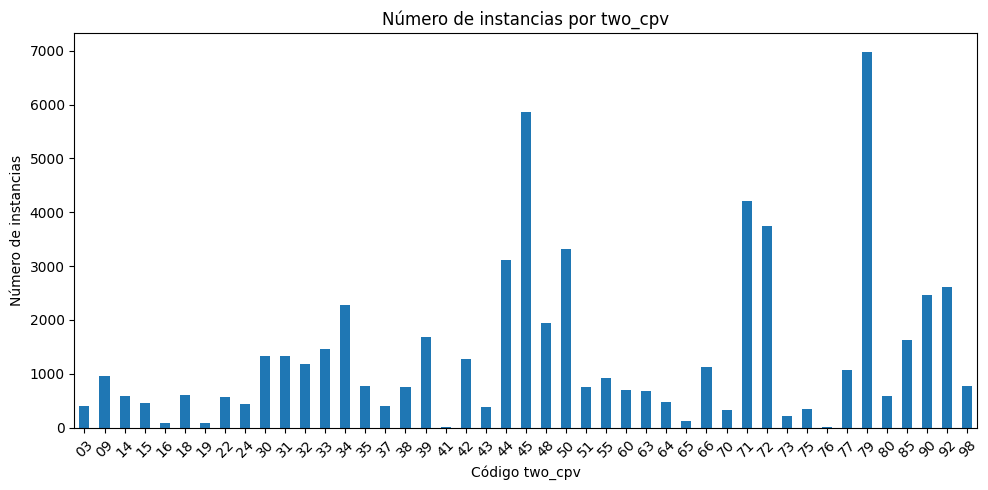

In [70]:
import matplotlib.pyplot as plt
import numpy as np

#sample_size = min(len(df), 1000)
#aux = df.sample(n=sample_size, random_state=42)

series_two_cpv = df_cpv5_all_info['two_cpv']
if series_two_cpv.apply(lambda x: isinstance(x, (list, tuple, np.ndarray))).any():
    exploded = df_cpv5_all_info.explode('two_cpv')
    counts = exploded['two_cpv'].astype(str).value_counts().sort_index()
else:
    counts = series_two_cpv.astype(str).value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(10, 5))
counts.plot(kind='bar')

plt.xlabel('Código two_cpv')
plt.ylabel('Número de instancias')
plt.title('Número de instancias por two_cpv')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
OUTPUT_DIR = "/export/usuarios_ml4ds/lbartolome/Repos/patchwork/data/paper_2026/train_data"
TEXT_COLUMN = "lemmas"

TOP_N = 50
BOTTOM_N = 50
LOW_TFIDF_PERCENTILE = 5  #  considera stopwords las palabras en el 5% más bajo de TF-IDF
HIGH_DF_THRESHOLD = 0.85   # palabras que aparecen en >85% de documentos
MIN_DF = 10                # palabras que aparecen en al menos 10 documentos
MAX_DF = 0.60              # excluir palabras que aparecen en más del 60% de documentos
NGRAM_RANGE = (1, 1)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
SPANISH_STOPWORDS = stopwords.words('spanish')

Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

df_exploded = df_cpv5_all_info.explode('two_cpv').reset_index(drop=True)

aggregated_by_cpv = (
    df_exploded
    .groupby('two_cpv', as_index=False)
    .size()
    .rename(columns={'size': 'count'})
    .sort_values('count', ascending=False)
).reset_index(drop=True)

print(f"Total CPVs encontrados: {len(aggregated_by_cpv)}")
print(f"\nTop 10 CPVs:")
print(aggregated_by_cpv.head(10))

# Crear carpeta por cada CPV y guardar parquet
cpv_folders = []

for idx, row in tqdm(aggregated_by_cpv.iterrows(), total=len(aggregated_by_cpv), desc="Creando carpetas"):
    cpv_code = row['two_cpv']
    count = row['count']
    
    # Crear carpeta
    cpv_folder = Path(OUTPUT_DIR) / f"{idx}_cpv_{cpv_code}"
    cpv_folder.mkdir(parents=True, exist_ok=True)
    
    # Filtrar y guardar datos
    df_filtered = df_exploded[df_exploded['two_cpv'] == cpv_code].copy()
    parquet_path = cpv_folder / f"cpv_{cpv_code}.parquet"
    df_filtered.to_parquet(parquet_path, index=False)
    
    cpv_folders.append(cpv_folder)
    assert len(df_filtered) == count

print(f"\n✓ Creadas {len(cpv_folders)} carpetas con sus parquets")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lbartolome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total CPVs encontrados: 45

Top 10 CPVs:
  two_cpv  count
0      79   6982
1      45   5861
2      71   4216
3      72   3742
4      50   3310
5      44   3121
6      92   2614
7      90   2461
8      34   2286
9      48   1951


Creando carpetas:  76%|███████▌  | 34/45 [00:07<00:01,  9.48it/s]

In [ ]:
# tf-idf per cpv
all_word_scores = []
all_low_words = []
all_frequent_words = []
cpv_summaries = {}

for cpv_folder in tqdm(cpv_folders, desc="Analizando CPVs"):
    cpv_code = cpv_folder.name.split('_cpv_')[1]
    
    parquet_path = list(cpv_folder.glob("cpv_*.parquet"))[0]
    df = pd.read_parquet(parquet_path)
    
    texts = df[TEXT_COLUMN].fillna("").astype(str).tolist()
    
    if len(texts) < MIN_DF:
        print(f" CPV {cpv_code}: Solo {len(texts)} documentos. Saltando...")
        continue
    
    vectorizer = TfidfVectorizer(
        max_features=5000,
        min_df=MIN_DF,
        max_df=MAX_DF,
        ngram_range=NGRAM_RANGE,
        stop_words=SPANISH_STOPWORDS,  
    )
    
    try:
        tfidf_matrix = vectorizer.fit_transform(texts)
    except ValueError as e:
        print(f" CPV {cpv_code}: Error en TF-IDF: {e}")
        continue
    
    feature_names = vectorizer.get_feature_names_out()
    tfidf_means = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
    doc_freq = np.asarray((tfidf_matrix > 0).sum(axis=0)).flatten()
    
    word_scores = pd.DataFrame({
        'word': feature_names,
        'tfidf_mean': tfidf_means,
        'doc_freq': doc_freq,
        'df_ratio': doc_freq / len(texts),
        'cpv_code': cpv_code
    }).sort_values('tfidf_mean', ascending=False)
    
    word_scores.to_csv(cpv_folder / "tfidf_scores.csv", index=False)
    
    top_words = word_scores.head(TOP_N)
    top_words.to_csv(cpv_folder / "top_words.csv", index=False)
        
    bottom_words = word_scores.tail(BOTTOM_N)
    bottom_words.to_csv(cpv_folder / "bottom_words.csv", index=False)
    
    threshold_low = word_scores['tfidf_mean'].quantile(LOW_TFIDF_PERCENTILE / 100)
    low_tfidf_words = word_scores[word_scores['tfidf_mean'] <= threshold_low].copy()
    low_tfidf_words.to_csv(cpv_folder / "low_tfidf_words.csv", index=False)
    
    with open(cpv_folder / "stopwords_low_tfidf.txt", 'w', encoding='utf-8') as f:
        for word in low_tfidf_words['word']:
            f.write(f"{word}\n")
    
    ultra_frequent = word_scores[word_scores['df_ratio'] > HIGH_DF_THRESHOLD].copy()
    ultra_frequent.to_csv(cpv_folder / "ultra_frequent_words.csv", index=False)
    
    with open(cpv_folder / "stopwords_ultra_frequent.txt", 'w', encoding='utf-8') as f:
        for word in ultra_frequent['word']:
            f.write(f"{word}\n")
    
    # las stopwords combinadas son la unión de las de bajo TF-IDF y las ultra-frecuentes
    cpv_stopwords = set(low_tfidf_words['word']).union(set(ultra_frequent['word']))
    with open(cpv_folder / "stopwords_combined.txt", 'w', encoding='utf-8') as f:
        for word in sorted(cpv_stopwords):
            f.write(f"{word}\n")
    
    cpv_summary = {
        'cpv_code': cpv_code,
        'num_documents': len(texts),
        'num_unique_words': len(feature_names),
        'num_low_tfidf_words': len(low_tfidf_words),
        'num_ultra_frequent_words': len(ultra_frequent),
        'num_stopwords_combined': len(cpv_stopwords)
    }
    
    with open(cpv_folder / "summary.json", 'w', encoding='utf-8') as f:
        json.dump(cpv_summary, f, indent=2, ensure_ascii=False)
    
    cpv_summaries[cpv_code] = cpv_summary
    
    all_word_scores.append(word_scores)
    all_low_words.append(low_tfidf_words)
    all_frequent_words.append(ultra_frequent)

Analizando CPVs: 100%|██████████| 45/45 [00:12<00:00,  3.73it/s]

 CPV 76: Solo 7 documentos. Saltando...


In [ ]:
global_output = Path(OUTPUT_DIR).parent / "_global_analysis_stops_all_cpvs_cpv5"
global_output.mkdir(parents=True, exist_ok=True)

# consolidate all scores into one dataframe
all_scores_df = pd.concat(all_word_scores, ignore_index=True)
all_scores_df.to_csv(global_output / "all_cpvs_tfidf_scores.csv", index=False)

# consolidate all low TF-IDF words
low_words_df = pd.concat(all_low_words, ignore_index=True)
low_words_df.to_csv(global_output / "all_low_tfidf_words.csv", index=False)

# in how many CPVs does each low TF-IDF word appear, and what's its average TF-IDF?
low_word_counts = low_words_df.groupby('word').agg({
    'cpv_code': 'count',
    'tfidf_mean': 'mean'
}).reset_index()
low_word_counts.columns = ['word', 'num_cpvs', 'avg_tfidf']
low_word_counts = low_word_counts.sort_values('num_cpvs', ascending=False)
low_word_counts.to_csv(global_output / "low_tfidf_words_cross_cpv.csv", index=False)

# consolidate all ultra-frequent words
frequent_words_df = pd.concat(all_frequent_words, ignore_index=True)
frequent_words_df.to_csv(global_output / "all_ultra_frequent_words.csv", index=False)

# count ultra-frequent words
frequent_word_counts = frequent_words_df.groupby('word').agg({
    'cpv_code': 'count',
    'df_ratio': 'mean',
    'tfidf_mean': 'mean'
}).reset_index()
frequent_word_counts.columns = ['word', 'num_cpvs', 'avg_df_ratio', 'avg_tfidf']
frequent_word_counts = frequent_word_counts.sort_values('num_cpvs', ascending=False)
frequent_word_counts.to_csv(global_output / "ultra_frequent_words_cross_cpv.csv", index=False)

# global stopwords: los que son de bajo TF-IDF en 3 o más CPVs, y los que son ultra-frecuentes en 3 o más CPVs
global_low_tfidf = set(low_word_counts[low_word_counts['num_cpvs'] >= 3]['word'])
global_ultra_freq = set(frequent_word_counts['word'])
global_stopwords = global_low_tfidf.union(global_ultra_freq)

with open(global_output / "global_stopwords_low_tfidf.txt", 'w', encoding='utf-8') as f:
    for word in sorted(global_low_tfidf):
        f.write(f"{word}\n")

with open(global_output / "global_stopwords_ultra_frequent.txt", 'w', encoding='utf-8') as f:
    for word in sorted(global_ultra_freq):
        f.write(f"{word}\n")

with open(global_output / "global_stopwords_combined.txt", 'w', encoding='utf-8') as f:
    for word in sorted(global_stopwords):
        f.write(f"{word}\n")

global_summary = {
    'num_cpvs_analyzed': len(cpv_summaries),
    'total_documents': sum(s['num_documents'] for s in cpv_summaries.values()),
    'avg_docs_per_cpv': np.mean([s['num_documents'] for s in cpv_summaries.values()]),
    'total_unique_words': len(all_scores_df['word'].unique()),
    'global_stopwords_low_tfidf': len(global_low_tfidf),
    'global_stopwords_ultra_frequent': len(global_ultra_freq),
    'global_stopwords_total': len(global_stopwords),
    'cpv_details': cpv_summaries
}

with open(global_output / "global_summary.json", 'w', encoding='utf-8') as f:
    json.dump(global_summary, f, indent=2, ensure_ascii=False)

In [ ]:
# consolidar stopwords por CPV + globales
global_stopwords_path = global_output / "global_stopwords_combined.txt"
with open(global_stopwords_path, 'r', encoding='utf-8') as f:
    global_stopwords = set(line.strip() for line in f if line.strip())
print(f"Cargadas {len(global_stopwords)} stopwords globales: {list(global_stopwords)[:10]}...")

cpv_folders = sorted([d for d in Path(OUTPUT_DIR).iterdir() if d.is_dir()])

print(len(cpv_folders), "carpetas CPV encontradas para consolidar stopwords.")


for cpv_folder in tqdm(cpv_folders, desc="Consolidando stopwords"):
    cpv_code = cpv_folder.name.split('_cpv_')[1]
    
    cpv_stopwords_path = cpv_folder / "stopwords_combined.txt"
    
    if not cpv_stopwords_path.exists():
        print(f"CPV {cpv_code}: No se encontró stopwords_combined.txt")
        continue
    
    with open(cpv_stopwords_path, 'r', encoding='utf-8') as f:
        cpv_stopwords = set(line.strip() for line in f if line.strip())
    
    consolidated_stopwords = cpv_stopwords.union(global_stopwords)
    
    output_path = cpv_folder / "stopwords_final.txt"
    with open(output_path, 'w', encoding='utf-8') as f:
        for word in sorted(consolidated_stopwords):
            f.write(f"{word}\n")
    
    summary_info = {
        'cpv_code': cpv_code,
        'cpv_stopwords': len(cpv_stopwords),
        'global_stopwords': len(global_stopwords),
        'consolidated_stopwords': len(consolidated_stopwords),
        'only_cpv': len(cpv_stopwords - global_stopwords),
        'only_global': len(global_stopwords - cpv_stopwords),
        'overlap': len(cpv_stopwords.intersection(global_stopwords))
    }
    
    # Guardar resumen en JSON
    import json
    with open(cpv_folder / "stopwords_consolidation_summary.json", 'w', encoding='utf-8') as f:
        json.dump(summary_info, f, indent=2, ensure_ascii=False)

Cargadas 56 stopwords globales: ['alerta', 'azul', 'variable', 'representación', 'rotación', 'presencia', 'estático', 'exclusivo', 'inicio', 'europeo']...
45 carpetas CPV encontradas para consolidar stopwords.


Consolidando stopwords: 100%|██████████| 45/45 [00:00<00:00, 74.88it/s] 

CPV 76: No se encontró stopwords_combined.txt
